<a href="https://colab.research.google.com/github/0201shj/CNN-Cats-Dogs/blob/main/2_cnn_dropout_batchnormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model1 - dropout

In [23]:
!cp ../content/drive/MyDrive/CNN-Cats-Dogs/training_data.zip

cp: missing destination file operand after '../content/drive/MyDrive/CNN-Cats-Dogs/training_data.zip'
Try 'cp --help' for more information.


In [ ]:
!unzip training_data.zip

In [ ]:
!unzip validation_data.zip

In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
%matplotlib inline

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [4]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [5]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


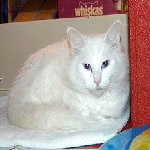

In [6]:
print(train_imgs[99].shape)
array_to_img(train_imgs[99])

In [6]:
batch_size = 50
num_classes = 2
epochs = 150
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog'] [1 1 0 0 1 1 0 1 1 1]


In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [9]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

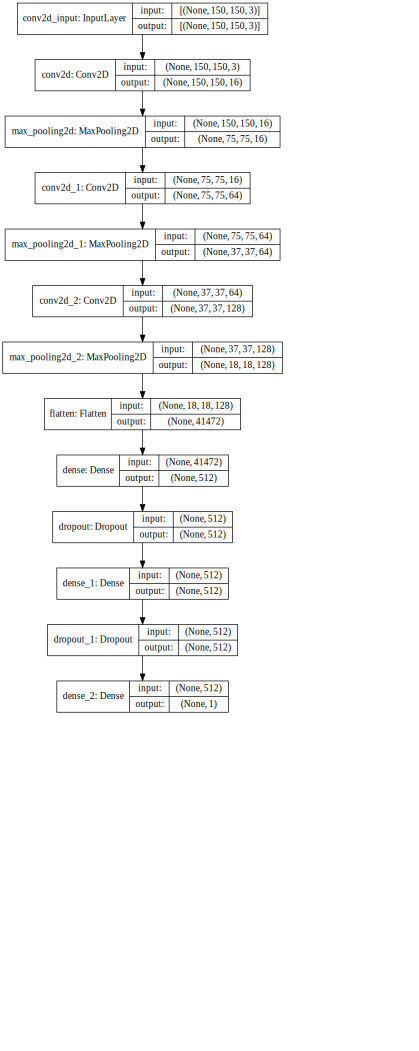

In [12]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB', dpi=49).create(prog='dot', format='svg'))

In [13]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/150
60/60 [==============================] - 6s 48ms/step - loss: 1.4008 - accuracy: 0.5085 - val_loss: 0.6850 - val_accuracy: 0.5450
Epoch 2/150
60/60 [==============================] - 3s 42ms/step - loss: 0.6734 - accuracy: 0.5765 - val_loss: 0.6993 - val_accuracy: 0.5970
Epoch 3/150
60/60 [==============================] - 3s 42ms/step - loss: 0.6453 - accuracy: 0.6441 - val_loss: 0.6470 - val_accuracy: 0.6250
Epoch 4/150
60/60 [==============================] - 3s 42ms/step - loss: 0.5881 - accuracy: 0.6941 - val_loss: 0.9110 - val_accuracy: 0.5630
Epoch 5/150
60/60 [==============================] - 3s 43ms/step - loss: 0.5427 - accuracy: 0.7338 - val_loss: 0.5718 - val_accuracy: 0.7060
Epoch 6/150
60/60 [==============================] - 3s 42ms/step - loss: 0.4520 - accuracy: 0.7818 - val_loss: 0.5490 - val_accuracy: 0.7350
Epoch 7/150
60/60 [==============================] - 3s 42ms/step - loss: 0.3691 - accuracy: 0.8464 - val_loss: 0.6228 - val_accuracy: 0.6990
Epoch 

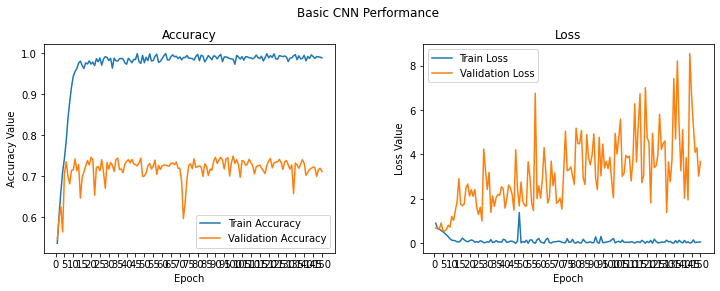

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 151))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 151, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 151, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [17]:
model.save('2-dropout-cnn.h5')

# Model2 - batchnormalization

In [8]:
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [13]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/150
60/60 [==============================] - 7s 52ms/step - loss: 0.9859 - accuracy: 0.5606 - val_loss: 0.9093 - val_accuracy: 0.5040
Epoch 2/150
60/60 [==============================] - 3s 45ms/step - loss: 0.7016 - accuracy: 0.6257 - val_loss: 0.6902 - val_accuracy: 0.5140
Epoch 3/150
60/60 [==============================] - 3s 45ms/step - loss: 0.5534 - accuracy: 0.7452 - val_loss: 0.6631 - val_accuracy: 0.5520
Epoch 4/150
60/60 [==============================] - 3s 45ms/step - loss: 0.4138 - accuracy: 0.8216 - val_loss: 0.9456 - val_accuracy: 0.5040
Epoch 5/150
60/60 [==============================] - 3s 45ms/step - loss: 0.3050 - accuracy: 0.8772 - val_loss: 0.8342 - val_accuracy: 0.5260
Epoch 6/150
60/60 [==============================] - 3s 47ms/step - loss: 0.1825 - accuracy: 0.9310 - val_loss: 0.6149 - val_accuracy: 0.6750
Epoch 7/150
60/60 [==============================] - 3s 45ms/step - loss: 0.1312 - accuracy: 0.9496 - val_loss: 0.8550 - val_accuracy: 0.6370
Epoch 

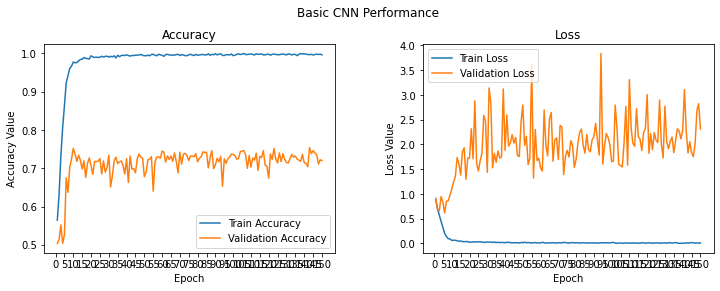

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 151))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 151, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 151, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [16]:
model.save('2-batchnormalization-cnn.h5')